# Katangal Grocery Management System


## Configuration & Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Data Acquisition
Loading the sales data and the basket data.

In [2]:
# Load main groceries dataset
groceries = pd.read_csv("./Groceries data.csv")

print("Groceries Dataset")
groceries.head()

Groceries Dataset


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [3]:
groceries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


## Data Preprocessing

In [4]:
# Data Preprocessing Function
groceries['Date'] = pd.to_datetime(groceries['Date'])
cols = ['year', 'month', 'day']
groceries = groceries.drop(columns=cols)
groceries['Member_number'] = groceries['Member_number'].astype(str)
groceries['day_of_week'] = groceries['Date'].dt.day_name()

groceries = groceries.set_index('Date')
groceries.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38765 entries, 2015-07-21 to 2014-12-26
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  object
 1   itemDescription  38765 non-null  object
 2   day_of_week      38765 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


# Exploratory Data Analysis (EDA)


## 1.1 Univariate Analysis (One Variable at a Time)


### A. Analysis of itemDescription


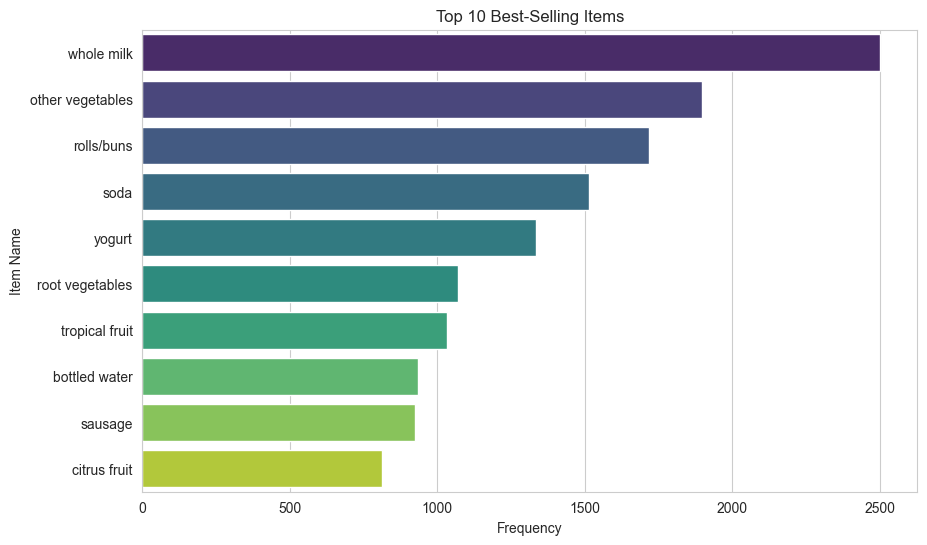

Number of unique items: 167


In [5]:
# Top 10 Best-Sellers
# Ensure visualization libraries are loaded
plt.figure(figsize=(10, 6))
top_items = groceries['itemDescription'].value_counts().head(10)
sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
plt.title('Top 10 Best-Selling Items')
plt.xlabel('Frequency')
plt.ylabel('Item Name')
plt.show()

print(f"Number of unique items: {groceries['itemDescription'].nunique()}")


In [6]:
# frequency of items sold
Frequency_of_items = groceries.groupby(pd.Grouper(key='itemDescription')).size().reset_index(name='count')
fig = px.treemap(Frequency_of_items, path=['itemDescription'], values='count')
fig.update_layout(title_text='Frequency of the Items Sold',title_x=0.5, title_font=dict(size=18))
fig.update_traces(textinfo="label+value")
fig.show()


### B. Temporal Analysis 
Analyzing purchase patterns across different time scales: Day of Week, Daily, Weekly, and Monthly.

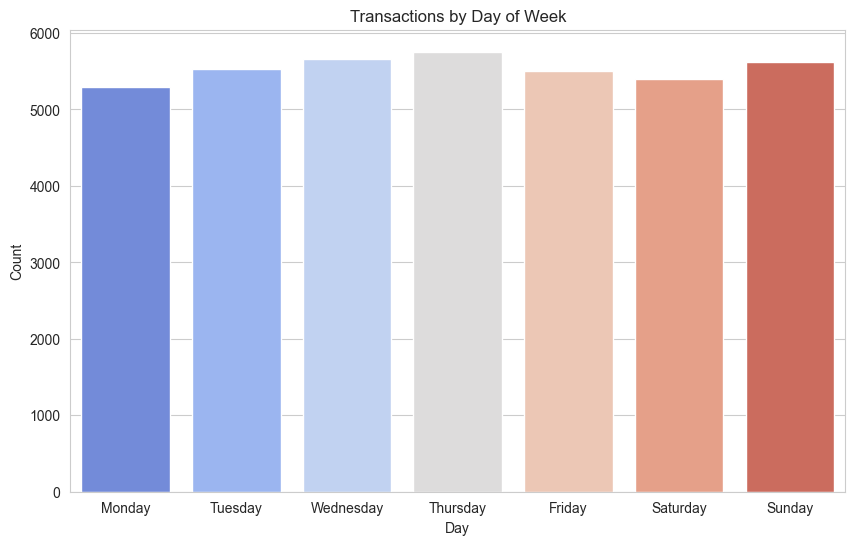

In [7]:
# Busiest Days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=groceries, order=days_order, palette='coolwarm')
plt.title('Transactions by Day of Week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()


#### Month & Day Distributions

In [8]:
# 1. Sales per Discrete Month
plt.figure(figsize=(10, 6))
monthly_sales = groceries.index.month.value_counts().sort_index()
month_names = [calendar.month_name[i] for i in monthly_sales.index]
    
sns.barplot(x=month_names, y=monthly_sales.values, palette='magma')
plt.title('Sales per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# 2. Sales per Discrete Day of Month
plt.figure(figsize=(12, 6))
daily_sales = groceries.index.day.value_counts().sort_index()
    
sns.barplot(x=daily_sales.index, y=daily_sales.values, palette='cool')
plt.title('Sales per Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Transactions')
plt.show()


NameError: name 'calendar' is not defined

<Figure size 1000x600 with 0 Axes>

#### Monthly Sales Comparison: 2014 vs 2015


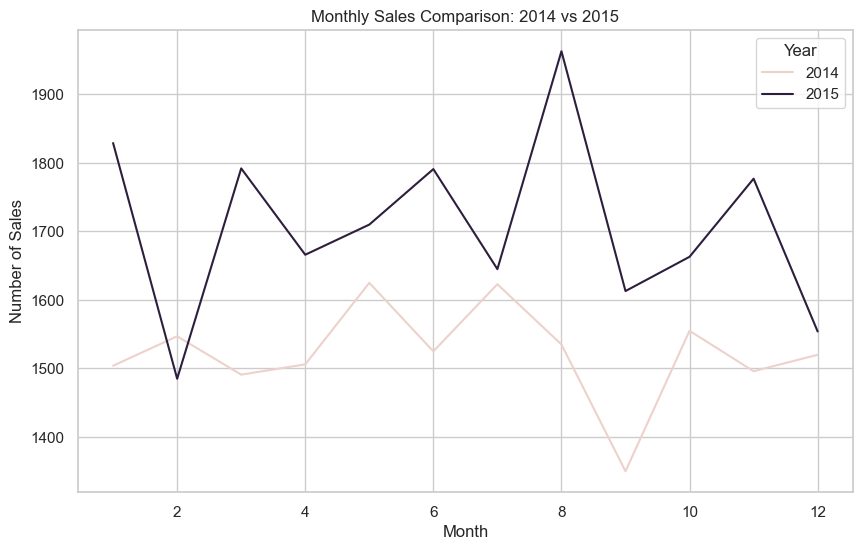

In [ ]:
# Monthly Sales Comparison by Year
# Create temp copy ensuring datetime index
temp_monthly = groceries.copy()
temp_monthly['Year'] = temp_monthly.index.year
temp_monthly['Month'] = temp_monthly.index.month

# Group by Year and Month
monthly_year_sales = temp_monthly.groupby(['Year', 'Month']).size().reset_index(name='Sales')

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(x='Month', y='Sales', hue='Year', data=monthly_year_sales)
plt.title('Monthly Sales Comparison: 2014 vs 2015')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.legend(title='Year')
plt.show()


#### Weekly Trends

In [ ]:
# Prepare data for Weekly Analysis
# Create a copy to avoid modifying original index if needed
temp_weekly = groceries.copy()
template_style = "plotly_white" 

# 1. Number of Sales Weekly
weekly_sales = temp_weekly.resample('W').size()
fig1 = px.line(weekly_sales, title='Number of Sales Weekly',labels={'y': 'Sales', 'index': 'Date'},markers=True,template=template_style)
fig1.show()

# 2. Number of Customers Weekly
weekly_customers = temp_weekly.resample('W')['Member_number'].nunique()
fig2 = px.line(weekly_customers, title='Number of Customers Weekly',labels={'y': 'Customers', 'index': 'Date'},markers=True, template=template_style)
fig2.show()

# 3. Sales per Customer Weekly
sales_ratio = weekly_sales / weekly_customers
fig3 = px.line(sales_ratio, title='Sales per Customer Ratio',labels={'y': 'Ratio', 'index': 'Date'},markers=True, template=template_style)
fig3.update_yaxes(rangemode="tozero")
fig3.show()


### C. Analysis of Member_number


In [ ]:
# Purchase Frequency Distribution
# Group by Member_number and count rows (items purchased)
user_item = groceries.groupby('Member_number').size().reset_index(name='count').sort_values(by='count', ascending=False)

fig = px.bar(user_item.head(25), x='Member_number', y='count',labels={'Member_number': 'Customer ID', 'count': 'Number of Items Bought'},color='count',color_continuous_scale='Viridis')
fig.update_layout(title_text='Top 25 Customers by Purchase Volume',title_x=0.5, title_font=dict(size=18))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.show()


## 1.2 Multivariate Analysis (Two or More Variables)



### A. Busy Days vs Months Heatmap


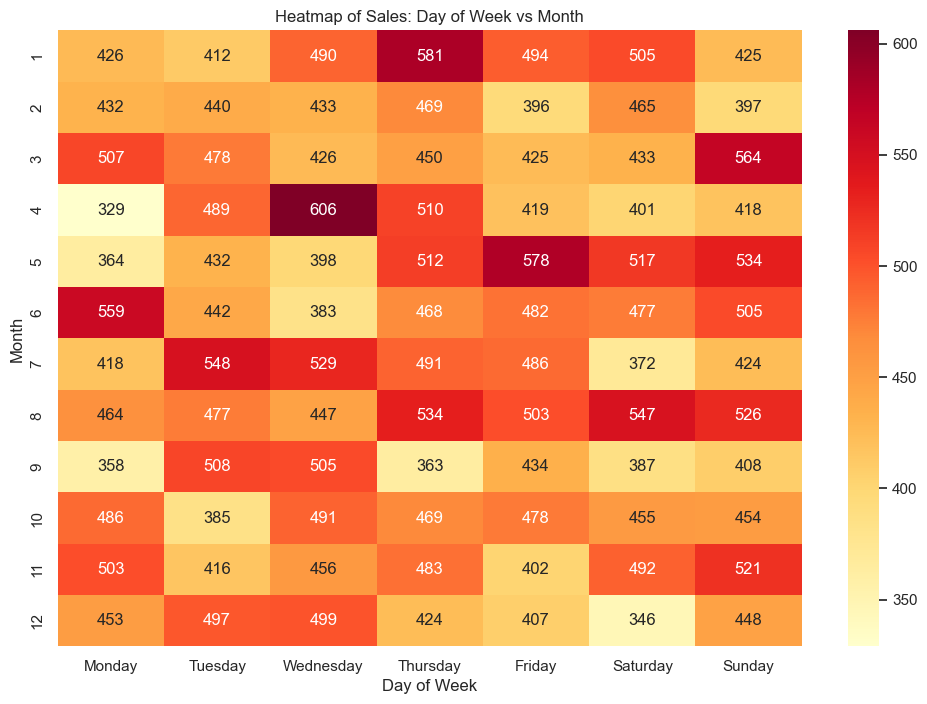

In [ ]:
# Heatmap: Day of Week vs Month
temp_hm = groceries.copy()
# Extract features
temp_hm['Month'] = temp_hm.index.month
temp_hm['DayOfWeek'] = temp_hm.index.day_name()

# Aggregate sales
heatmap_data = temp_hm.groupby(['Month', 'DayOfWeek']).size().unstack(fill_value=0)

# Sort days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(columns=days_order)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Heatmap of Sales: Day of Week vs Month')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.show()


### B. Item vs. Day (itemDescription x day_of_week)


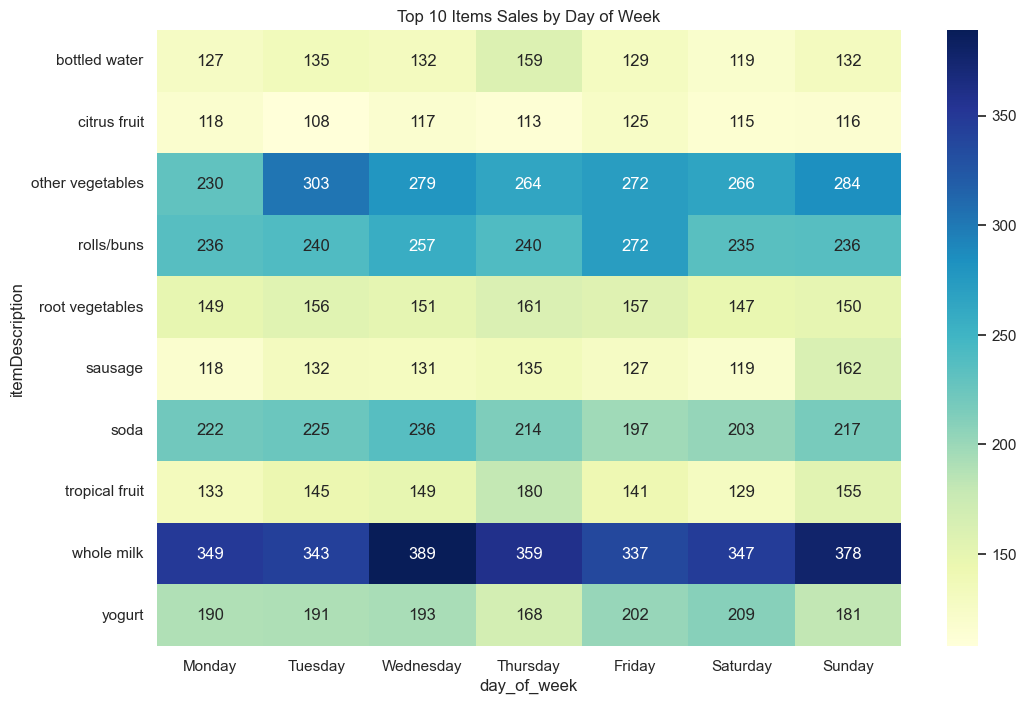

In [ ]:
# Heatmap: Top 10 Items vs Day of Week
top_10_list = groceries['itemDescription'].value_counts().head(10).index
heatmap_data = groceries[groceries['itemDescription'].isin(top_10_list)]

ct = pd.crosstab(heatmap_data['itemDescription'], heatmap_data['day_of_week'])
ct = ct.reindex(columns=days_order) 

plt.figure(figsize=(12, 8))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Top 10 Items Sales by Day of Week')
plt.show()


### C. Basket Size Analysis (Member x Item)


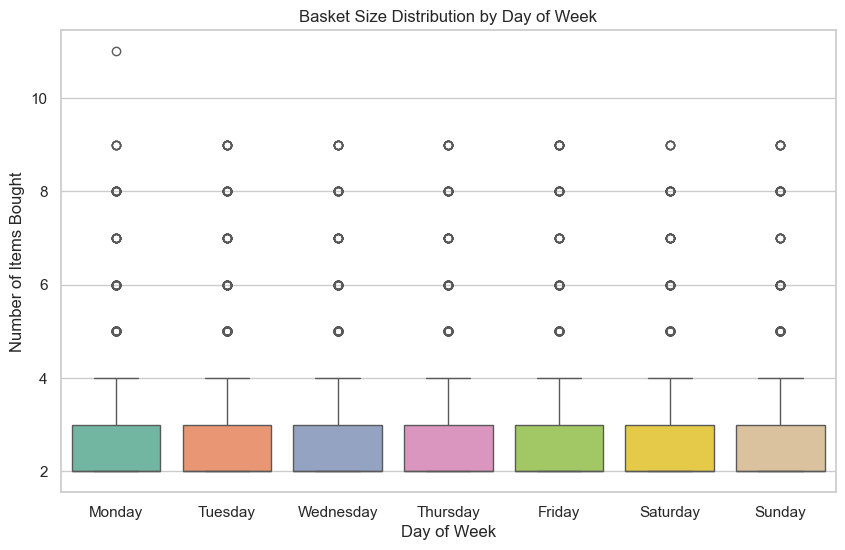

In [ ]:
# Average Basket Size by Day
temp = groceries.copy()
temp.reset_index(inplace=True)

# Group by Member, Date(Trip), and Day
basket_sizes = temp.groupby(['Member_number', 'Date', 'day_of_week'])['itemDescription'].count().reset_index()
basket_sizes.rename(columns={'itemDescription': 'BasketSize'}, inplace=True)
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='BasketSize', data=basket_sizes, order=days_order, palette='Set2')
plt.title('Basket Size Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Items Bought')
plt.show()


# Market Basket Analysis (Apriori Algorithm)
Using `mlxtend` to discover association rules between items.

## Data Preprocessing: Item List
Creating a list of items per member using a loop.

In [ ]:
# Create Crosstab / Pivot Table
basket = pd.crosstab(groceries['Member_number'], groceries['itemDescription'])

item_list = []
# Grouping by Member_number to analyze Customer Purchase History
for index, group in groceries.groupby(['Member_number']):
    item_list.append(group['itemDescription'].tolist())

basket['item_list'] = item_list
print(f"Created item list for {len(item_list)} members.")

basket_items = basket['item_list']

basket.drop(columns=['item_list'], inplace=True)
basket_items

Created item list for 3898 members.


Member_number
1000    [soda, canned beer, sausage, sausage, whole mi...
1001    [frankfurter, frankfurter, beef, sausage, whol...
1002    [tropical fruit, butter milk, butter, frozen v...
1003    [sausage, root vegetables, rolls/buns, deterge...
1004    [other vegetables, pip fruit, root vegetables,...
                              ...                        
4996    [dessert, salty snack, rolls/buns, misc. bever...
4997    [tropical fruit, white wine, whole milk, curd,...
4998                                   [rolls/buns, curd]
4999    [bottled water, butter milk, tropical fruit, b...
5000    [soda, bottled beer, fruit/vegetable juice, ro...
Name: item_list, Length: 3898, dtype: object

## Encoding

In [ ]:
# Encode Logic
def encode_units(x):
    if x >= 1:
        return 1
    else:
        return 0

basket_sets = basket_numeric.map(encode_units)
print("Encoded Basket Shape:", basket_sets.shape)
basket_sets.head()

Encoded Basket Shape: (3898, 167)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Apriori Function
Function to run Apriori, extract rules, and show top 5 results.

In [ ]:
def run_market_basket_analysis(items, min_support=0.15, min_lift=1.0):
    
    item_df = basket_sets.loc[basket_sets[items] == 1]
    # Frequent Itemsets
    frequent_itemsets = apriori(item_df, min_support=min_support, use_colnames=True)
    print(f"Found {len(frequent_itemsets)} frequent itemsets.")
    
    # Association Rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_lift)
    
    # display_cols = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
    # print(rules.sort_values(by='lift', ascending=False).head(5)[display_cols])
    return rules['consequents'].unique()[:5]

# Run the function
run_market_basket_analysis('ice cream')


Found 59 frequent itemsets.


array([frozenset({'ice cream'}), frozenset({'beef'}),
       frozenset({'bottled beer'}), frozenset({'bottled water'}),
       frozenset({'butter'})], dtype=object)

# Customer Segmentation (RFM Analysis & K-Means)


In [ ]:
# RFM Calculation
rfm_data = groceries.copy()
rfm_data = rfm_data.reset_index()
rfm_data.rename(columns={'index': 'Date'}, inplace=True)


last_date = rfm_data['Date'].max() + pd.Timedelta(days=1)
rfm = rfm_data.groupby('Member_number').agg({
    'Date': lambda x: (last_date - x.max()).days, # Recency
    'Member_number': 'count' # Monetary (Volume)
})
    
# Frequency
frequency = rfm_data.groupby('Member_number')['Date'].nunique()
rfm['Frequency'] = frequency
    
rfm.rename(columns={'Date': 'Recency', 'Member_number': 'Volume'}, inplace=True)
    
# Scaling
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm.index, columns=rfm.columns)
    
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    silhouette = silhouette_score(rfm_scaled_df, kmeans.fit_predict(rfm_scaled_df))
    print(f"Silhouette Score for {i} clusters: {silhouette:.4f}")


Silhouette Score for 2 clusters: 0.3974
Silhouette Score for 3 clusters: 0.3834
Silhouette Score for 4 clusters: 0.3524
Silhouette Score for 5 clusters: 0.3579
Silhouette Score for 6 clusters: 0.3374
Silhouette Score for 7 clusters: 0.3332
Silhouette Score for 8 clusters: 0.3115
Silhouette Score for 9 clusters: 0.3147
Silhouette Score for 10 clusters: 0.3211


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled_df)
    
centroid_means = rfm.groupby('Cluster').mean()

scaled_centers = pd.DataFrame(scaler.transform(centroid_means), columns=centroid_means.columns, index=centroid_means.index)
scaled_centers['Score'] = scaled_centers['Frequency'] + scaled_centers['Volume'] - scaled_centers['Recency']
    
# Sort clusters by Score: High Score -> VIP, Low Score -> Lost
ranked_clusters = scaled_centers.sort_values('Score', ascending=False).index.tolist()
# ranked_clusters[0] = VIP / Champions
# ranked_clusters[1] = Occasional / Regulars
# ranked_clusters[2] = Lost / At-Risk
    
segment_map = {
    ranked_clusters[0]: 'VIP / Champions',
    ranked_clusters[1]: 'Occasional / Regulars',
    ranked_clusters[2]: 'Lost / At-Risk'
}
    
rfm['Segment'] = rfm['Cluster'].map(segment_map)
    
    # Visualization
fig = px.scatter_3d(rfm, x='Recency', y='Frequency', z='Volume',
                  color='Segment', opacity=0.8,
                  title='3D Customer Segments (RFM)',
                  labels={'Recency': 'Recency (Days)', 'Frequency': 'Frequency (Visits)', 'Volume': 'Volume (Items)'},
                  color_discrete_map={'VIP / Champions': 'green', 'Occasional / Regulars': 'blue', 'Lost / At-Risk': 'red'})
    
fig.update_layout(scene = dict(
                xaxis_title='Recency (Days)',
                yaxis_title='Frequency (Visits)',
                zaxis_title='Volume (Items)'),
                width=900, height=700,
                margin=dict(r=20, b=10, l=10, t=10))
fig.show()
    
print("Segment Profile (Means):")
print(rfm.groupby('Segment')[['Recency', 'Frequency', 'Volume']].mean().sort_values('Volume', ascending=False))



Segment Profile (Means):
                          Recency  Frequency     Volume
Segment                                                
VIP / Champions        111.551887   5.971698  15.947327
Occasional / Regulars  118.814901   3.110012   7.950524
Lost / At-Risk         425.822687   2.229075   5.309471
